In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier

In [4]:
n_points = 100
X, y = make_classification(n_samples=n_points, n_clusters_per_class=1,  weights=[0.1, 0.9], random_state=12)
print(f"No. of points in each class:\n '1': {len(y[y==1])} \n '0': {len(y[y==0])}")

No. of points in each class:
 '1': 90 
 '0': 10


In [5]:
## Creating a dummy classifier that always predicts 'prior' class (i.e class with most no. of points) 
dummy_clf = DummyClassifier(strategy="prior", random_state=12)
dummy_clf.fit(X, y)

DummyClassifier(constant=None, random_state=12, strategy='prior')

## How **ACCURACY** behaves on imbalanced dataset?

In [6]:
## Compute a model's accuracy
def accuracy(y_true, y_pred):
  N = len(y_true)
  acc_count = 0
  for i in range(N):
    if y_true[i] == y_pred[i]:
      acc_count+=1
  return acc_count/N

y_pred = dummy_clf.predict(X)
print(f"Accuracy of the dumb model : {accuracy(y, y_pred)}")

Accuracy of the dumb model : 0.9


* *`accuracy`* of the dummy model(which always predicts '1') is *`90%`*
* Something is going **wrong** here? What's that?
  *   accuracy doesn't take classes into consideration
  *   This is the drawback of *`accuracy`* as a model evaluvation metric


## Is there a better scheme than accuracy?
Yes, That's **CONFUSION MATRIX** and it's derivatives

* Confusion matrix(on binary classification) is built using 4 numbers
  *  TP (True Positive)
  *  TN (True Negative)
  *  FP (False Positive)
  *  FN (False Negative)

* If the model is sensible, the *`TP and TN`* should be high and, *`FP and FN`* should be low.

In [7]:
def confusion_matrix(y_true, y_pred):
  N = len(y_true)
  TN = 0; TP = 0
  FP = 0; FN = 0

  for i in range(N):
    if y_true[i] == 0 and y_pred[i] == 0:
      TN+=1
    elif y_true[i] == 1 and y_pred[i] == 1:
      TP+=1
    elif y_true[i] == 0 and y_pred[i] == 1:
      FP+=1
    elif y_true[i] == 1 and y_pred[i] == 0:
      FN+=1
  return TN, TP, FN, FP

TN, TP, FN, FP = confusion_matrix(y, y_pred)
print(f"Confusion matrix : TN={TN}, TP={TP}, FN={FN}, FP={FP}")

Confusion matrix : TN=0, TP=90, FN=0, FP=10


* Here TP is high, that's good on positive points, <br/>but TN=0 i.e the model is performing very poor on negtive datapoints.
* Overall the model performs very poor.
----------------------------------------------
Let us see few other metrics,
  *  TPR = TP/(TP+FN)
  *  TNR = TN/(TN+FP)
  *  FPR = FP/(TN+FP)
  *  FNR = FN/(TP+FN)

* If the model is sensible, the TPR and TNR should be high and, FPR and FNR should be low.

In [8]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(TN+FP)
FNR = FN/(TP+FN)

print(f" TPR={TPR}, TNR={TNR}, FPR={FPR}, FNR={FNR}")

 TPR=1.0, TNR=0.0, FPR=1.0, FNR=0.0


* Here TPR is high, that's good for positive points, <br/>but TNR=0 i.e the model is performing very poor on negtive datapoints.
* Overall the model performs very poor.

## Is there a way to get a single metric that tells about a the model performance instead of 4 values?

Yes, Now let's talk about **PRECIESION**, **RECALL** and **F1-SCORE**


* **Preciesion** says out of *`predicted`* positive points, how many of them were *`actually`* positive
* **Recall** says out of *`actual`* positive points, how many of them are *`predited`* to be positive by the model. (nothing but **TPR**)

PRECIESION = TP/(TP+FP) <br/>
RECALL = TP/(TP+FN)

In [9]:
PRECIESION = TP/(TP+FP)
RECALL = TP/(TP+FN)

print(f"PRECIESION = {PRECIESION}, RECALL = {RECALL}")

PRECIESION = 0.9, RECALL = 1.0


* PRECIESION = 90% means, out of 100 +ve predictions only 90 of them were +ve rest 10% of them are missclassified.
* RECALL = 100% means, out of actual 100 +ve points all of them were predicted to be positive.

* PRECIESION and RECALL doesn't take -ve points into concideration.

* We can combine PRECIESION and RECALL to get a single valued performance metric, i.e **F1-SCORE**

In [10]:
F1_SCORE = (2 * PRECIESION * RECALL) / (PRECIESION + RECALL)

print(f"F1_SCORE for the dumb model : {F1_SCORE}")

F1_SCORE for the dumb model : 0.9473684210526316


## **AUC ROC**
AUC ROC thresholds all possible predected probilities scores

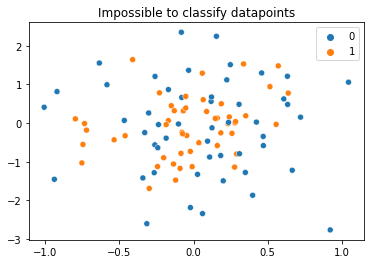

In [11]:
## Generating datapoints which are impossible to seperate 
n_points = 100
X, y = make_classification(n_samples=n_points, n_clusters_per_class=1, class_sep=0,
                           n_features=2, n_informative=2, n_redundant=0, random_state=8)
plt.title("Impossible to classify datapoints")
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

In [12]:
clf = SGDClassifier(loss='log')
clf.fit(X, y)
y_pred = clf.predict_proba(X)[:,1]
#y_pred1 = clf1.predict(X1)

In [13]:
## Sort the predicted probabilities
def sort_proba(y_true, y_pred):
  N = len(y_true)
  y_true_pred = []
  for i in range(N):
    y_true_pred.append((y_true[i], y_pred[i]))
  
  return sorted(y_true_pred, key=lambda x:x[1], reverse=True)

## Compute fpr and tpr for every threshold
def roc(y_true, y_pred):
  N = len(y_true)
  fprs = []; tprs = []
  eps = 1e-5

  y_true_pred = sort_proba(y_true, y_pred)
  for i in range(N):
    threshold = y_true_pred[i][1]
    y_hat = []
    for j in range(N):
      if y_true_pred[j][1] >= threshold:
        y_hat.append(1)
      else:
        y_hat.append(0)
    
    TN, TP, FN, FP = confusion_matrix(y_true, y_hat)
    FPR = FP/(TN+FP+eps)
    TPR = TP/(TP+FN+eps)
    fprs.append(FPR)
    tprs.append(TPR)

  return fprs, tprs

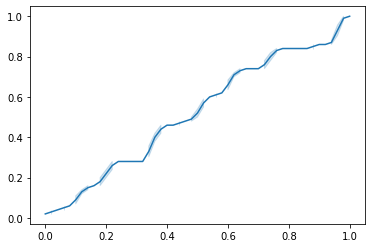

AUC ROC : 0.4799998080000576


In [14]:
## ROC and AUC ROC
fprs, tprs = roc(y, y_pred)
sns.lineplot(x=fprs, y=tprs)
plt.show()

print(f"AUC ROC : {np.trapz(fprs, tprs)}")

## **BINARY LOG LOSS**
*Log loss tries to penalize for small variations in the predicted probabilities*

In [22]:
def log_loss(y_true, y_pred):
    loss = 0
    N = len(y_true)
    for i in range(N):
      if y_true[i]:
        loss += -np.log10(y_pred[i])
      else:
        loss += -np.log10(1-y_pred[i])
    return loss/N

def return_class_labels(y_true, y_pred):
  N = len(y_true)
  y_hat = []
  for i in range(N):
    if y_pred[i] >= 0.5:
      y_hat.append(1)
    else:
      y_hat.append(0)
  return y_hat

In [27]:
## Let y_true be the ground truth class labels
y_true =        [1.0, 1.0,  1.0, 0.0, 0.0,  0.0, 1.0 , 0.0 , 1.0]

## Let's create a dummy proba predictions for Model 1 and Model 2
y_pred_model1 = [0.6, 0.7,  0.9, 0.4, 0.2,  0.4, 0.56, 0.33, 0.1]
y_pred_model2 = [0.9, 0.89, 0.9, 0.1, 0.01, 0.2, 0.78, 0.21, 0.1]

## What if the we treat 0.5 as a threshold to classify points 
## and use accuracy and test which model is the best
y_pred1 = return_class_labels(y_true, y_pred_model1)
y_pred2 = return_class_labels(y_true, y_pred_model2)
print(f" Accuracy on model1 = {accuracy(y_true, y_pred1)} \n Accuracy on model2 = {accuracy(y_true, y_pred2)}")

 Accuracy on model1 = 0.8888888888888888 
 Accuracy on model2 = 0.8888888888888888


* Accuracy says **model1 and model2 are same** and are 88% accurate,<br/> but that isn't true when we look at their actual proba scores.

In [30]:
print(f" log loss on model1 = {log_loss(y_true, y_pred_model1)} \n log loss on model2 = {log_loss(y_true, y_pred_model2)}")

 log loss on model1 = 0.26542809807739076 
 log loss on model2 = 0.1666039543851886


* It is evedent from their **log loss**, the **model 2 is better than model 1**
   * i.e log loss on model1 is larger than model2
   * Model2's probabilities are very much nearer to the y_true class labels than Model1's probabilities
   * Even the accuracy on these models are same, but the log loss identified the best one because the log loss penalizes for small variations in the predicted probabilities 
